<a href="https://colab.research.google.com/github/Taweilo/House_Price_Prediction/blob/main/Code_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MIT License

Copyright (c) 2023 Tawei Lo

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# House Price Prediction

 <img src="https://www.bouzaien.com/post/house-pricing-prediction/featured.png" width="1100" height="450">

### Importing all the libraries

In [102]:
# Data wrangling
import pandas as pd # handle dataframe &
import numpy as np # deal with number and data

# Data vizualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML data preparation & cross-validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
from sklearn.preprocessing import StandardScaler # standardize the features
from sklearn.preprocessing import scale

# Statistical learning methods
import statsmodels.api as sm # linear regression
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

# ML methods
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree # Regression tree & plot the tree

# Ensembel methods
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb

# Neural network
from tensorflow.keras.models import Sequential # put layers together
from tensorflow.keras.layers import Dense # define the layer

# Model evaluation
from sklearn.metrics import mean_squared_error

#Ignore Warning
import warnings
warnings.simplefilter("ignore")

# set the random seed fixed for code reproduction
SEED = 12345

## 2. Data Understanding

### 2.1 Loading the data
House Price Data

In [103]:
# Provide the raw file URL
csv_url = 'https://raw.githubusercontent.com/Taweilo/house_price_predicttion/main/Housing%20data.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(csv_url)
# Display the first few rows of the DataFrame
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### 2.2 Feature Description

In [104]:
#check dimension
df.shape

(545, 13)

In [105]:
# check data type and missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [106]:
# how many data are missing of each variable
null_counts = df.isnull().sum()
null_counts

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [107]:
# Assuming your DataFrame is named df
categorical_columns = df.select_dtypes(include=['object'])

# Check the data type of each object column
for column in categorical_columns:
    print(f"Column '{column}' , unique: {categorical_columns[column].unique()}")

Column 'mainroad' , unique: ['yes' 'no']
Column 'guestroom' , unique: ['no' 'yes']
Column 'basement' , unique: ['no' 'yes']
Column 'hotwaterheating' , unique: ['no' 'yes']
Column 'airconditioning' , unique: ['yes' 'no']
Column 'prefarea' , unique: ['yes' 'no']
Column 'furnishingstatus' , unique: ['furnished' 'semi-furnished' 'unfurnished']


In [108]:
# Descriptive analysis
df.describe().round(1)

,price,area,bedrooms,bathrooms,stories,parking
count,545.0,545.0,545.0,545.0,545.0,545.0
mean,4766729.2,5150.5,3.0,1.3,1.8,0.7
std,1870439.6,2170.1,0.7,0.5,0.9,0.9
min,1750000.0,1650.0,1.0,1.0,1.0,0.0
25%,3430000.0,3600.0,2.0,1.0,1.0,0.0
50%,4340000.0,4600.0,3.0,1.0,2.0,0.0
75%,5740000.0,6360.0,3.0,2.0,2.0,1.0
max,13300000.0,16200.0,6.0,4.0,4.0,3.0


In [109]:
corr = df.corr()
corr

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


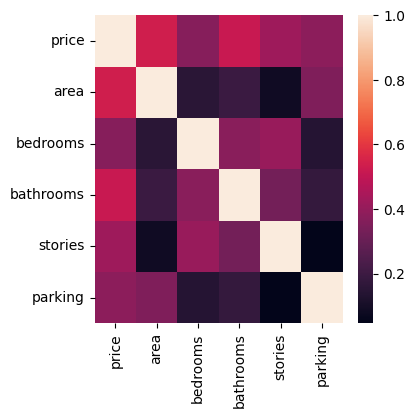

In [110]:
plt.figure(figsize=(4, 4))
_ = sns.heatmap(corr,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values)

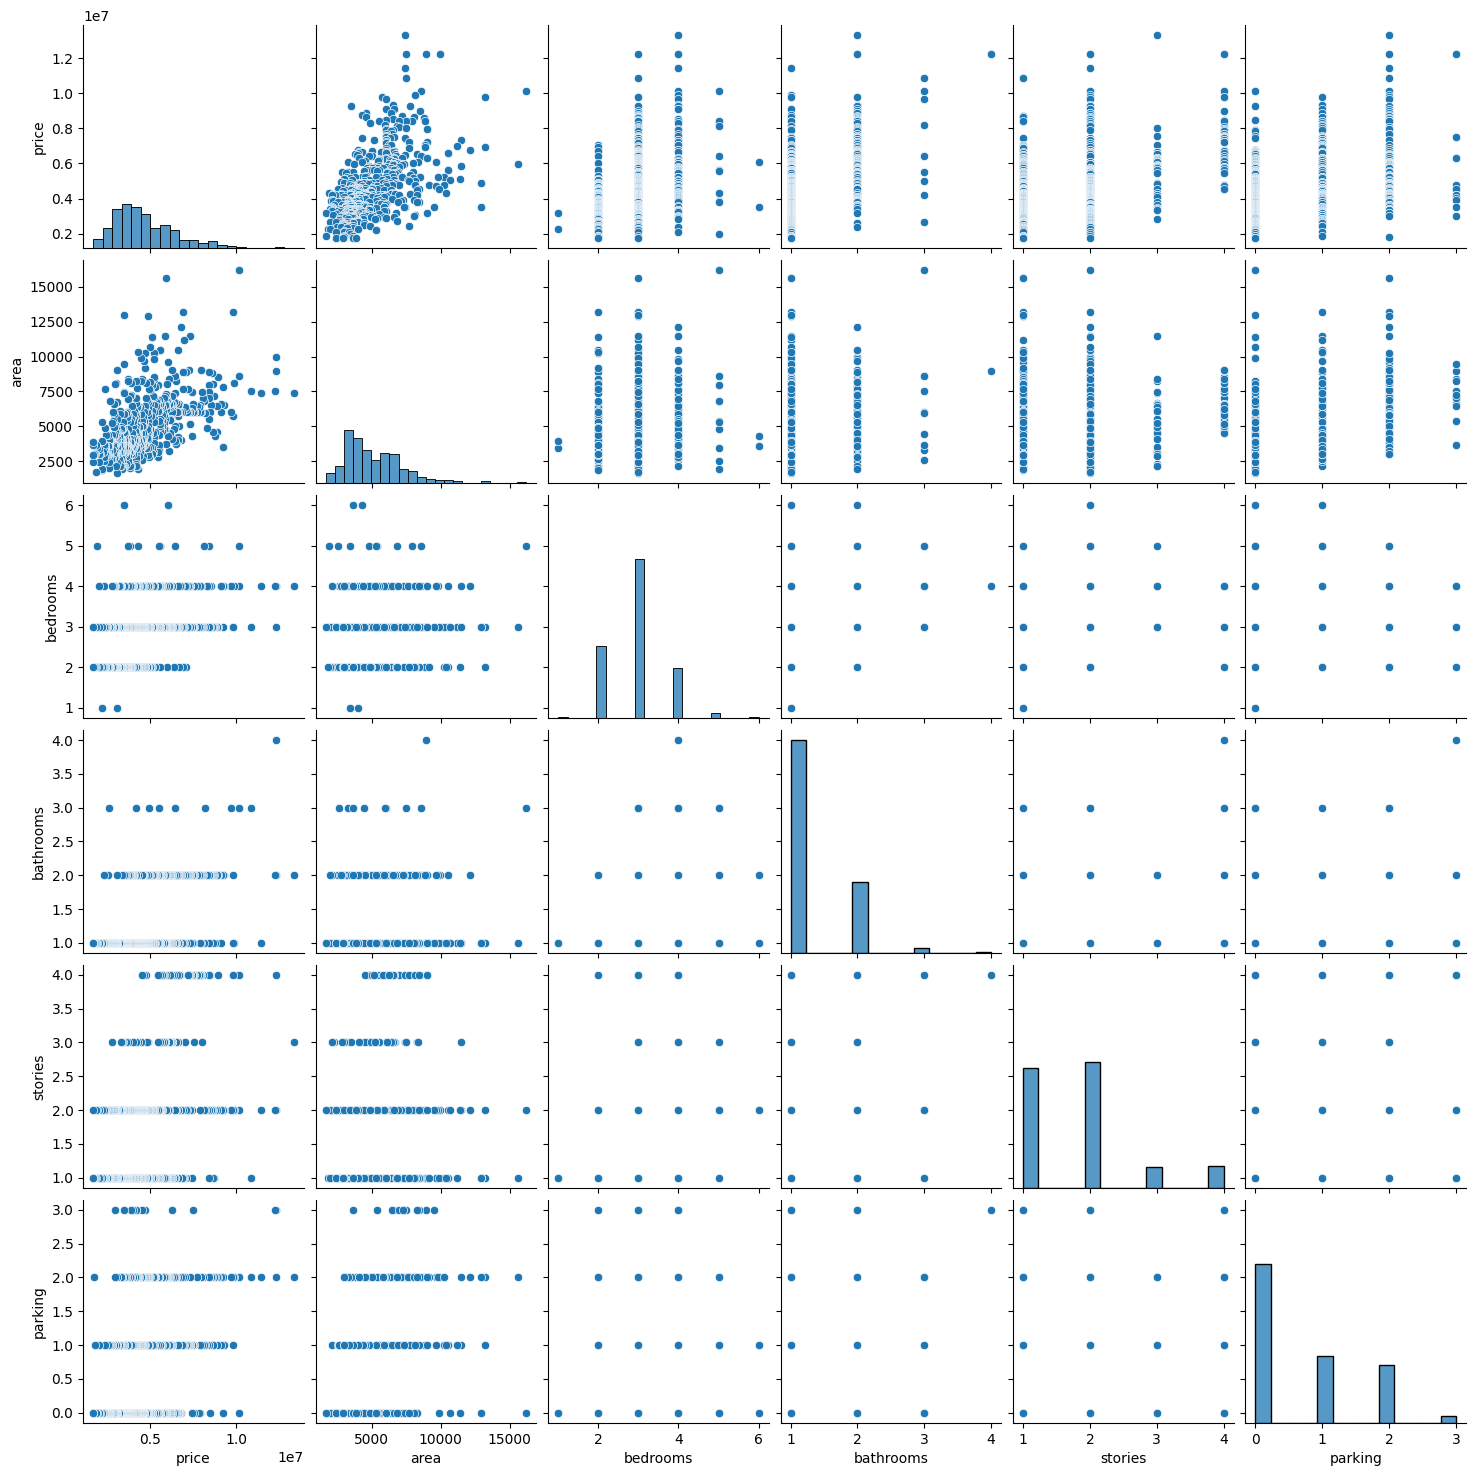

In [111]:
df_pairplot =columns_to_plot = df.select_dtypes(include=['int64'])
sns.pairplot(df_pairplot, palette="bright")
plt.show()

## 3. Data Preparation
### 3.1 Remove the null (data is clean no need of cleasing)

In [112]:
# Remove all rows with null values
df= df.dropna()

In [113]:
# check the missing data again --->no more missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### 3.2 Define variables

In [114]:
# Create X, Y
y = df['price'] # define Y
X = df.drop(['price'], axis=1) # define X by dropping irrelevent features
X = pd.get_dummies(data=X, drop_first=True) # make dummy variable 3(=4-1) extra dummy variables(K-1)
X.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,7420,4,1,2,2,1,1,1,0,1,0,0,0


### 3.3 Split the data for train and test

In [115]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state = 42) # split data 70% for training

In [116]:
print(X_train.shape) # 381 instances for taining
print(X_test.shape)  # 164 instances for testing

(381, 13)
(164, 13)


## 4. Modeling
### 4.1 Linear Regression

In [117]:
linear_regressor = LinearRegression()
linear_regressor.fit(scale(X_train), y_train)
y_pred = linear_regressor.predict(scale(X_test))

In [118]:
print(pd.Series(linear_regressor.coef_.flatten(), index=X.columns))

area                               550762.643172
bedrooms                            60813.437198
bathrooms                          528860.126344
stories                            359569.571505
parking                            253425.417399
mainroad_yes                       140091.966506
guestroom_yes                      107358.986630
basement_yes                       231590.482738
hotwaterheating_yes                137463.987151
airconditioning_yes                319283.723673
prefarea_yes                       216284.014015
furnishingstatus_semi-furnished    -60189.216980
furnishingstatus_unfurnished      -180876.865830
dtype: float64


In [119]:
mse_lr = round(mean_squared_error(y_test, y_pred),3)
print(f"Test MSE for Linear Regression is {mse_lr}")

Test MSE for Linear Regression is 1504056526296.172


### 4.2 LASSO CV

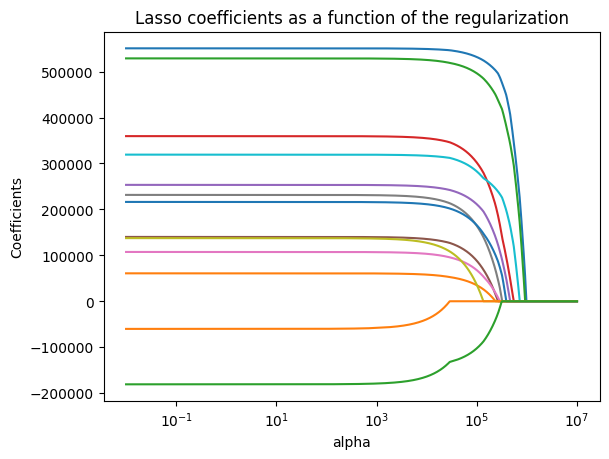

In [120]:
alphas = 10**np.linspace(-2,7,1000)

lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a, max_iter=10000) # increase iterations for optimization of coefficients
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
# plt.legend(list(X_train.columns), loc='best')

plt.title('Lasso coefficients as a function of the regularization');

In [121]:
# find the best alpha via CV with selected scoring metric
lassocv = LassoCV(alphas=alphas, cv=5, max_iter=1000) # CV= 5 folds
lassocv.fit(scale(X_train), y_train)
print('The best alpha from LassoCV:', round(lassocv.alpha_,3))

The best alpha from LassoCV: 0.01


In [122]:
# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)
print('The coefficients are:')
print(pd.Series(lasso.coef_.flatten(), index=X.columns))

The coefficients are:
area                               550762.641547
bedrooms                            60813.434456
bathrooms                          528860.123130
stories                            359569.566614
parking                            253425.413518
mainroad_yes                       140091.961999
guestroom_yes                      107358.982718
basement_yes                       231590.476282
hotwaterheating_yes                137463.977143
airconditioning_yes                319283.721276
prefarea_yes                       216284.009093
furnishingstatus_semi-furnished    -60189.196119
furnishingstatus_unfurnished      -180876.848949
dtype: float64


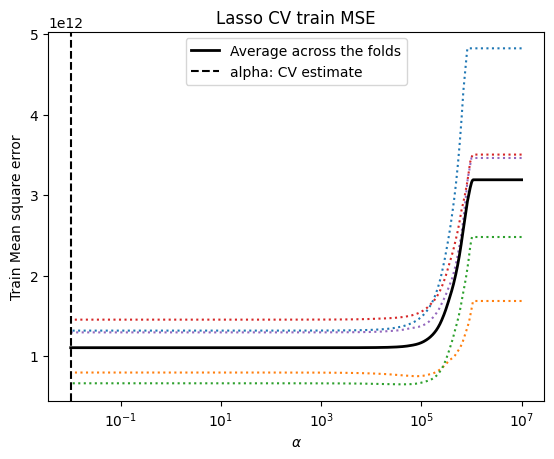

In [123]:
plt.semilogx(lassocv.alphas_, lassocv.mse_path_, linestyle=":")
plt.plot(
    lassocv.alphas_,
    lassocv.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lassocv.alpha_, linestyle="--", color="black", label="alpha: CV estimate")


plt.xlabel(r"$\alpha$")
plt.ylabel("Train Mean square error")
plt.legend()
plt.title("Lasso CV train MSE")
plt.show()

In [124]:
y_pred=lasso.predict(scale(X_test))
mse_lasso = round(mean_squared_error(y_test, y_pred),3)
print(f"Test MSE {mse_lasso}")

Test MSE 1504056532150.295


### 4.3 Ridge CV

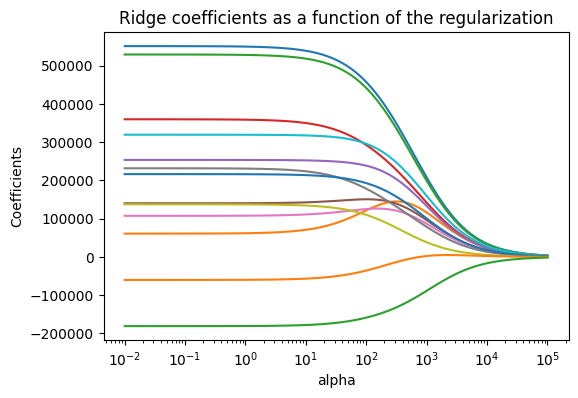

In [125]:
alphas = 10**np.linspace(-2,5,100)

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X_train), y_train)
    coefs.append(ridge.coef_)

fig, ax1 = plt.subplots(figsize=(6, 4))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')

plt.title('Ridge coefficients as a function of the regularization');

In [126]:
# set a large alpha to get smaller coefficients
ridge = Ridge(alpha=1000)
ridge.fit(scale(X_train), y_train)

print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X.columns))

The coefficients are:
area                               208079.128020
bedrooms                           116087.873634
bathrooms                          199134.452939
stories                            141965.831952
parking                            133158.973209
mainroad_yes                        96121.364215
guestroom_yes                       86697.073093
basement_yes                        78620.545553
hotwaterheating_yes                 38322.785990
airconditioning_yes                159590.449958
prefarea_yes                       100585.487730
furnishingstatus_semi-furnished      2335.552987
furnishingstatus_unfurnished       -88663.947841
dtype: float64


In [127]:
# find the best alpha via CV with selected scoring metric
ridgecv = RidgeCV(alphas=alphas, cv=5, scoring='neg_mean_squared_error') # cv= 5 folds
ridgecv.fit(scale(X_train), y_train)
print('The best alpha from RidgeCV:', round(ridgecv.alpha_,2))

The best alpha from RidgeCV: 24.77


In [128]:
# with the best alpha
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(scale(X_train), y_train)
print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X.columns))

The coefficients are:
area                               522127.037065
bedrooms                            83382.030812
bathrooms                          503131.946891
stories                            337104.839288
parking                            250183.540548
mainroad_yes                       145428.522288
guestroom_yes                      115119.161107
basement_yes                       213414.453060
hotwaterheating_yes                129630.240255
airconditioning_yes                314276.621666
prefarea_yes                       209880.027446
furnishingstatus_semi-furnished    -52325.412196
furnishingstatus_unfurnished      -174040.669977
dtype: float64


In [129]:
y_pred=ridge.predict(scale(X_test))
mse_ridge = round(mean_squared_error(y_test, y_pred),3)
print(f"Test MSE {mse_ridge}")

Test MSE 1513444500091.872


### 4.4 Elastic net

In [130]:
ENcv = ElasticNetCV(alphas=None, cv=5, max_iter=1000) # default l1_ratio=0.5
ENcv.fit(scale(X_train), y_train)

print('The best alpha from ElasticNetCV:', round(ENcv.alpha_,3))

The best alpha from ElasticNetCV: 1954.608


In [131]:
# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)

EN=ElasticNet()
EN.set_params(alpha=ENcv.alpha_)
EN.fit(scale(X_train), y_train)

print('The coefficients are:')
print(pd.Series(EN.coef_.flatten(), index=X.columns))

The coefficients are:
area                               996.790008
bedrooms                           686.226833
bathrooms                          952.564652
stories                            721.699885
parking                            685.656708
mainroad_yes                       514.872788
guestroom_yes                      483.957327
basement_yes                       389.964605
hotwaterheating_yes                141.236975
airconditioning_yes                822.822478
prefarea_yes                       515.358922
furnishingstatus_semi-furnished     75.155580
furnishingstatus_unfurnished      -490.949780
dtype: float64


In [132]:
y_pred = EN.predict(scale(X_test))
mse_EN = round(mean_squared_error(y_test, y_pred), 3)
print(f"Test MSE {mse_EN}")

Test MSE 4294469635534.099


### 4.5 KNN

In [133]:
mse_train = [-1]*50
mse_test = [-1]*50
for K in range(50):
    model = KNeighborsRegressor(n_neighbors = K+1)
    model.fit(scale(X_train), y_train)  #fit the model
    mse_train[K] = mean_squared_error(y_train, model.predict(scale(X_train)))
    mse_test[K] = mean_squared_error(y_test, model.predict(scale(X_test)))

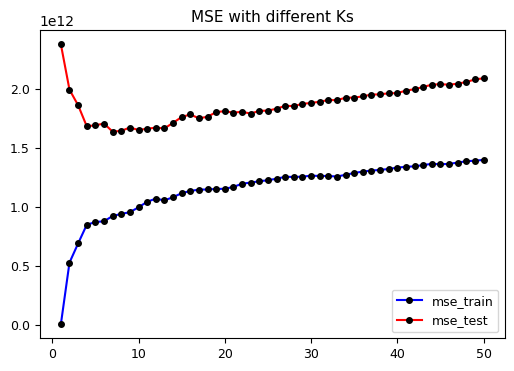

In [134]:
fig, ax1 = plt.subplots(figsize=(6, 4))
plt.plot(np.arange(50)+1, mse_train,  color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black',label = 'mse_train')
plt.plot(np.arange(50)+1, mse_test,  color = 'red',marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black', label = 'mse_test')
plt.legend(fontsize=9)
plt.title('MSE with different Ks', fontsize=11)
plt.tick_params(labelsize=9)
plt.show()

In [135]:
# optimal k
np.argmin(mse_test)+1

7

In [136]:
# optimal MSE
print(f"Test MSE {round(min(mse_test),3)}")

Test MSE 1638170777579.878


### KNN CV

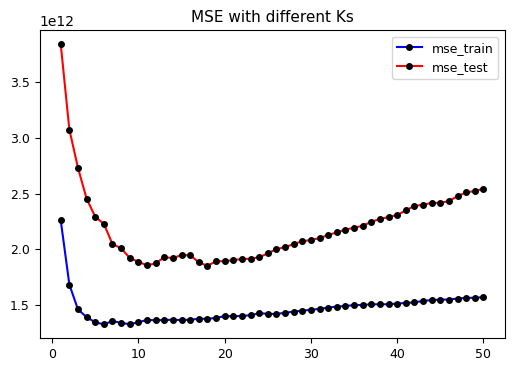

In [137]:
mse_train = []
mse_test = []
for K in range(1, 51):
    knn = KNeighborsRegressor(n_neighbors=K)
    scores_train = -cross_val_score(knn, scale(X_train), y_train, cv=5, scoring='neg_mean_squared_error')
    scores_test = -cross_val_score(knn, scale(X_test), y_test, cv=5, scoring='neg_mean_squared_error')
    mse_train.append(np.mean(scores_train))
    mse_test.append(np.mean(scores_test))

fig, ax1 = plt.subplots(figsize=(6, 4))
plt.plot(np.arange(50)+1, mse_train,  color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black',label = 'mse_train')
plt.plot(np.arange(50)+1, mse_test,  color = 'red',marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black', label = 'mse_test')
plt.legend(fontsize=9)
plt.title('MSE with different Ks', fontsize=11)
plt.tick_params(labelsize=9)
plt.show()

In [138]:
# optimal k
opt_k=np.argmin(mse_test)+1
opt_k

18

In [139]:
# optimal MSE
opt_mse=round(min(mse_test),3)
print(f"Test MSE {opt_mse}")

Test MSE 1853183303162.103


### 4.7 Decision Tree Regressor CV

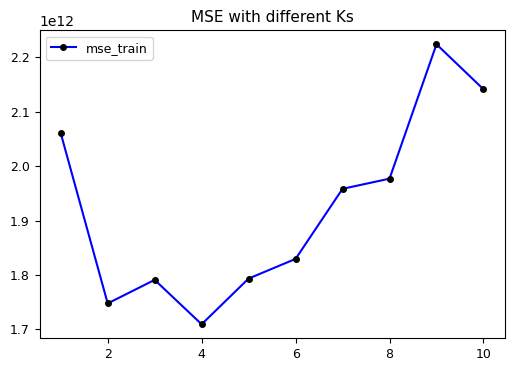

,max_depth,train MSE
0,1,2.060651e+12
1,2,1.747769e+12
2,3,1.791047e+12
3,4,1.709452e+12
4,5,1.793489e+12
5,6,1.829604e+12
6,7,1.958403e+12
7,8,1.977028e+12
8,9,2.224022e+12
9,10,2.141351e+12



The best model has max_depth=4 with a cross-validation train MSE of 1709452261680.55.


In [140]:
# create list to store the mse for each value of max_depth
mse_dtr = []

# fit regression tree and evaluate using cross-validation for max_depth from 1 to 10
for i in range(1, 11):
    dtc_i = DecisionTreeRegressor(max_depth=i, random_state=0)
    # perform 5-fold cross-validation and get the mean squared error
    cv_mse_dtr  = -cross_val_score(dtc_i, scale(X_train), y_train, cv=5, scoring='neg_mean_squared_error').mean()
    mse_dtr.append(cv_mse_dtr )

fig, ax1 = plt.subplots(figsize=(6, 4))
plt.plot(np.arange(10)+1, mse_dtr,  color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black',label = 'mse_train')
plt.legend(fontsize=9)
plt.title('MSE with different Ks', fontsize=11)
plt.tick_params(labelsize=9)
plt.show()

df.dtr = pd.DataFrame({'max_depth': np.arange(10) + 1, 'train MSE': mse_dtr})
display(df.dtr)  # Display the DataFrame using the display() function

# find the index of the model with the lowest MSE
best_model_idx = np.argmin(mse_dtr)
best_mse_dtr = mse_dtr[best_model_idx]
print(f"\nThe best model has max_depth={best_model_idx+1} with a cross-validation train MSE of {round(best_mse_dtr,3)}.")

Test MSE 3280562223870.9


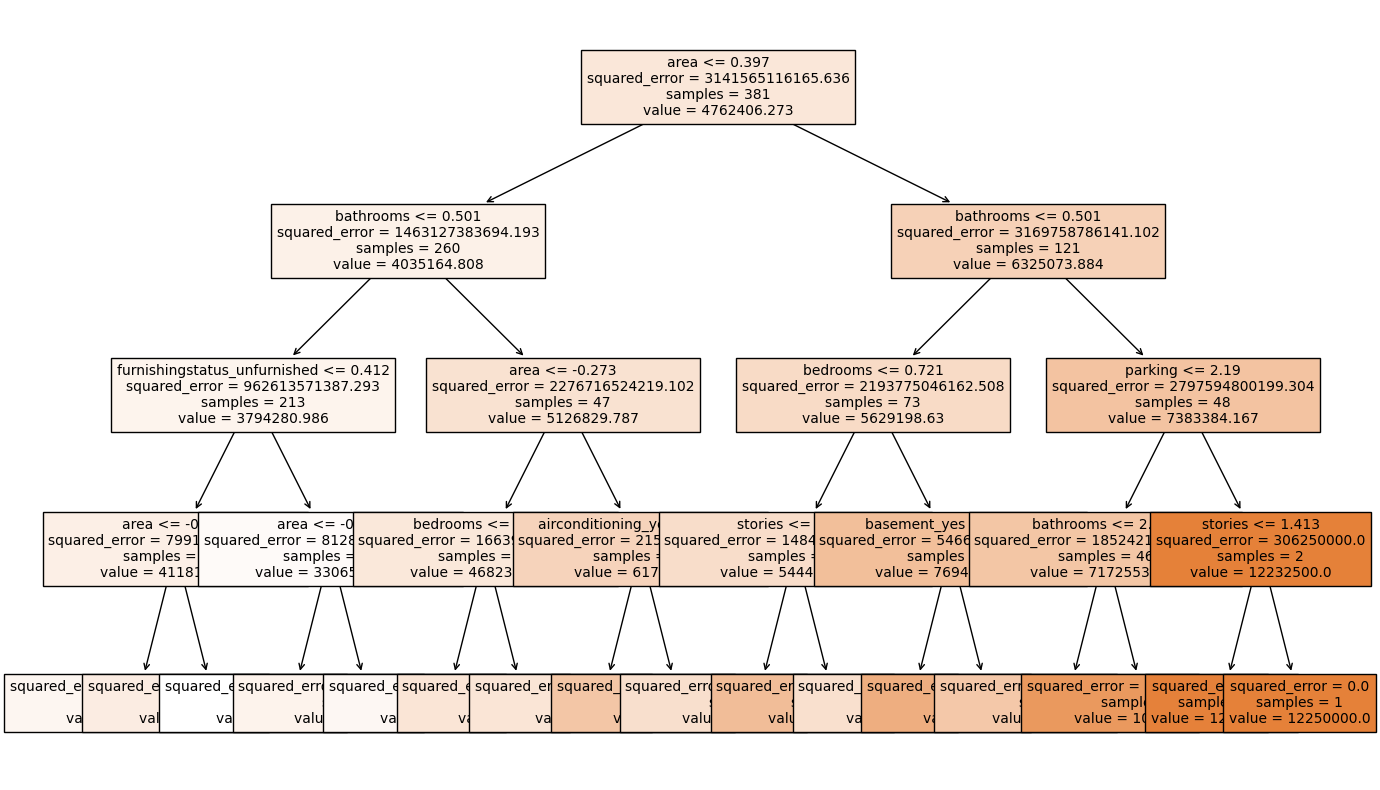

In [141]:
# Visualize regression tree
regr_tree =  DecisionTreeRegressor(max_depth=best_model_idx+1,random_state = 0)
model=regr_tree.fit(scale(X_train),y_train)
fn = X.columns
cn = y.unique()
plt.figure(figsize = (16,10))
plot_tree(regr_tree, feature_names = fn, class_names = cn, filled = True, fontsize=10);
y_pred=regr_tree.predict(scale(X_test))
mse_regr_tree = round(mean_squared_error(y_test, y_pred),2)
print(f"Test MSE {mse_regr_tree}")

### 4.6 Bagging

In [142]:
# default estimator is decision tree
# n_estimator: The number of base estimators in the ensemble.
regr_bag = BaggingRegressor(n_estimators=10, random_state=0).fit(scale(X_train), y_train)

In [143]:
y_pred=regr_bag.predict(scale(X_test))
mse_bagging = round(mean_squared_error(y_test, y_pred),3)
print(f"Test MSE {mse_bagging}")

Test MSE 2296816082169.74


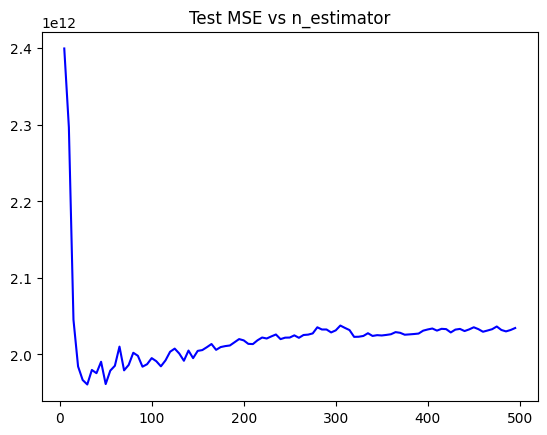

In [144]:
mse_list_bagging = []
n_list = np.arange(5,500,5)
for n in n_list:
    regr_bag = BaggingRegressor(n_estimators=n,random_state=0).fit(scale(X_train), y_train)
    y_pred=regr_bag.predict(scale(X_test))
    mse_bagging = round(mean_squared_error(y_test, y_pred),2)
    mse_list_bagging.append(mse_bagging)

plt.plot(n_list, mse_list_bagging,  color = 'blue', markerfacecolor = 'black',label = 'Test MSE')
plt.title('Test MSE vs n_estimator')
plt.show()

### 4.7 Random Forest

In [145]:
regr_RF = RandomForestRegressor(n_estimators=10, random_state=0).fit(scale(X_train), y_train)

In [146]:
y_pred=regr_RF.predict(scale(X_test))
mse_RF = round(mean_squared_error(y_test, y_pred),3)
print(f"Test MSE {mse_RF}")

Test MSE 2209998424630.547


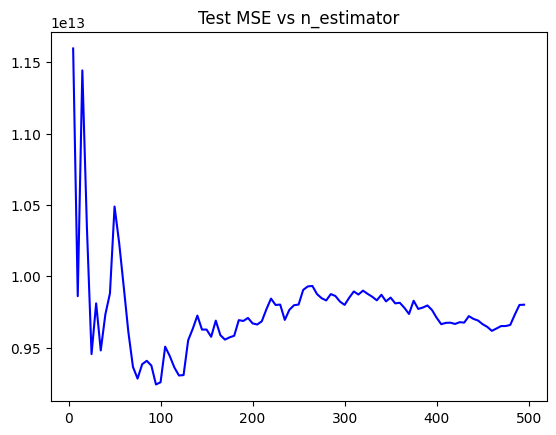

In [147]:
mse_list_RF = []
n_list = np.arange(5,500,5)
for n in n_list:
    regr_RF = RandomForestRegressor(n_estimators=n,random_state=0).fit(scale(X_train), y_train)
    y_pred=regr_RF.predict(X_test)
    mse_RF = round(mean_squared_error(y_test, y_pred),3)
    mse_list_RF.append(mse_RF)

plt.plot(n_list, mse_list_RF,  color = 'blue', markerfacecolor = 'black',label = 'Test MSE')
plt.title('Test MSE vs n_estimator')
plt.show()

#### Feature Importance

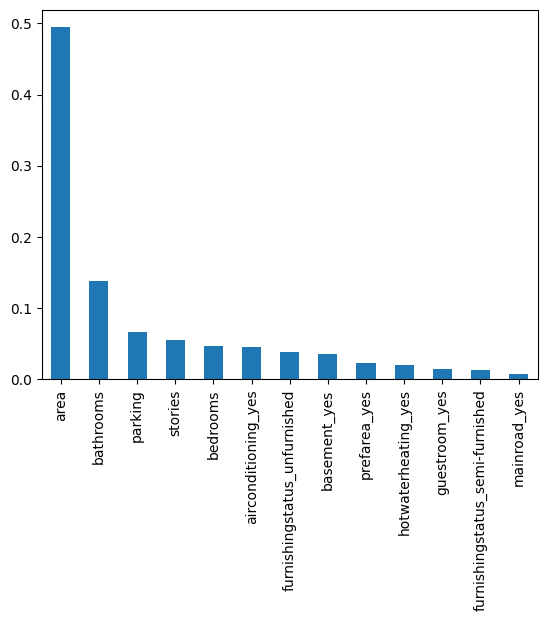

In [148]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(regr_RF.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [149]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['sqrt', 'log2',None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000]}


In [150]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(scale(X_train), y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=42, verbose=2)

In [151]:
rf_random.best_params_

{'n_estimators': 1155,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': False}

In [152]:
best_rd = rf_random.best_estimator_

In [153]:
y_pred = best_rd.predict(scale(X_test))
mse_RF_cv = round(mean_squared_error(y_test, y_pred), 3)
print(f"Test MSE for RF hyperparameter tuning is {mse_RF_cv}")

Test MSE for RF hyperparameter tuning is 1745775410545.672


## 5. Evaluation

In [159]:
# Define data
model_names = ['Linear Regression', 'Lasso CV', 'Ridge CV', 'Elastic Net CV',
        'KNN CV','Decision Tree Regressor CV', 'Bagging', 'Random Forest CV']
mse_values = [ mse_lr, mse_lasso, mse_ridge, mse_EN,
         opt_mse, mse_regr_tree, mse_bagging, mse_RF_cv]
hyperparameters = ["N/A",
           f"alpha= {round(lassocv.alpha_,2)}",
           f"alpha= {round(ridgecv.alpha_,2)}",
           f"alpha= {round(ENcv.alpha_,2)}",
           f"k={opt_k}",
           f"max_depth= {best_model_idx+1}",
           "n_estimators=10",
           "n_estimators: 944, min_samples_split: 10, min_samples_leaf: 4, max_depth: 20"]
# Create table
df.evaluation = pd.DataFrame({
    'Model': model_names,
    'MSE': mse_values,
    'Hyperparameters': hyperparameters
})
# Print table
display(df.evaluation)

,Model,MSE,Hyperparameters
0,Linear Regression,1.504057e+12,N/A
1,Lasso CV,1.504057e+12,alpha= 0.01
2,Ridge CV,1.513445e+12,alpha= 24.77
3,Elastic Net CV,4.294470e+12,alpha= 1954.61
4,KNN CV,1.853183e+12,k=18
5,Decision Tree Regressor CV,3.280562e+12,max_depth= 4
6,Bagging,2.034584e+12,n_estimators=10
7,Random Forest CV,1.745775e+12,"n_estimators: 944, min_samples_split: 10, min_..."
